# 02ProvinceCOVID19

# Libraries

In [97]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display

# Load Data

In [98]:
province = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\province.csv",
    index_col=False,
    skipinitialspace=True,
)

# Modify the Date Column

In [99]:
province["date"] = province["date"].astype("datetime64[ns]")

# Delete Unneeded Columns

In [100]:
province = province.drop(["time", "released"], axis=1)

# Rename Columns

In [101]:
province.rename(
    columns={
       "date": "Date",
        "province": "Province",
        "confirmed": "Confirmed",
        "deceased": "Deceased"
    },
    inplace=True,
)

# The First Five Rows

In [102]:
province.head()

,Date,Province,Confirmed,Deceased
0,2020-01-20,Seoul,0,0
1,2020-01-20,Busan,0,0
2,2020-01-20,Daegu,0,0
3,2020-01-20,Incheon,1,0
4,2020-01-20,Gwangju,0,0


# Confirmed Cases by Province

In [103]:
groupby_province = (
    province[["Province", "Confirmed"]]
    .groupby(["Province"])
    .max()
    .sort_values("Confirmed", ascending=False)
)

groupby_province = groupby_province.reset_index()

In [104]:
groupby_province.query('Confirmed>1000', inplace=True)

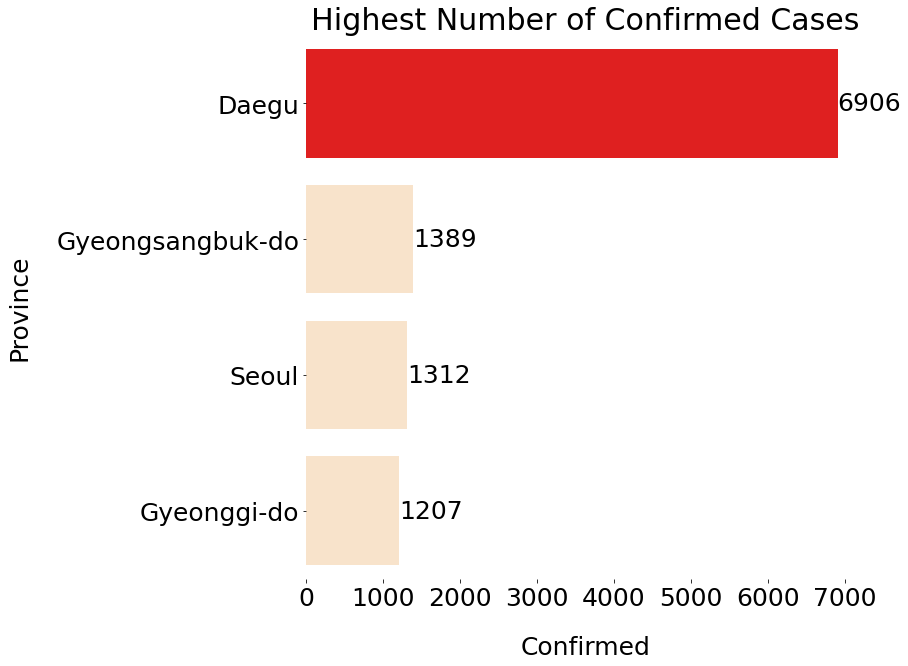

In [105]:
plt.figure(figsize=(10, 10))

plt.title("Highest Number of Confirmed Cases", fontsize=30, y=1);

ord_color = "bisque"
spec_lev1 = "red"

palette = {
    "Daegu": spec_lev1,
    "Gyeongsangbuk-do": ord_color,
    "Seoul": ord_color,
    "Gyeonggi-do": ord_color,
}

chart = sns.barplot(
    x="Confirmed",
    y="Province",
    ci=None,
    dodge=False,
    data=groupby_province,
    order=groupby_province.sort_values("Confirmed", ascending=False).Province,
    palette=palette
)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Confirmed", fontsize=25, labelpad=25)
plt.ylabel("Province", fontsize=25, labelpad=25)

sns.despine(left=True, bottom=True)
chart.bar_label(chart.containers[0], size=25);

In [106]:
province_all = (
    province[["Province", "Confirmed", "Deceased"]].groupby(["Province"]).max()
)
province_all.head()

,Confirmed,Deceased
Province,,
Busan,154,3
Chungcheongbuk-do,65,0
Chungcheongnam-do,167,0
Daegu,6906,189
Daejeon,117,1


In [110]:
province_all['Population'] = [1, 5, 6, 3 4 6 7 ]

ValueError: Length of values (3) does not match length of index (17)

In [107]:
# province_all["Percentage"] = (
#     province_all["Deceased"] / province_all["Confirmed"]
# ) * 100
# province_all["Percentage"] = (
#     province_all["Percentage"].apply("{:,.2f}".format).astype("float64")
# )
# province_all.sort_values("Confirmed", ascending=False)
# province_all.reset_index(inplace=True)
# province_all.head()

In [108]:
plt.figure(figsize=(20, 10))

bottom = sns.barplot(
    x="Province",
    y="Confirmed",
    ci=None,
    dodge=False,
    data=province_all,
    order=province_all.sort_values("Confirmed", ascending=False).Province,
    color = 'red'
)

# sns.barplot(x = "Province", y = "Deceased", color = "#0000A3")

topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Province", fontsize=25, labelpad=25)
plt.ylabel("Confirmed", fontsize=25, labelpad=25)


plt.title("Confirmed Cases by Province", fontsize=30, y=1);
sns.despine(left=True, bottom=True)
bottom.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right");

AttributeError: 'DataFrame' object has no attribute 'Province'

<Figure size 1440x720 with 0 Axes>

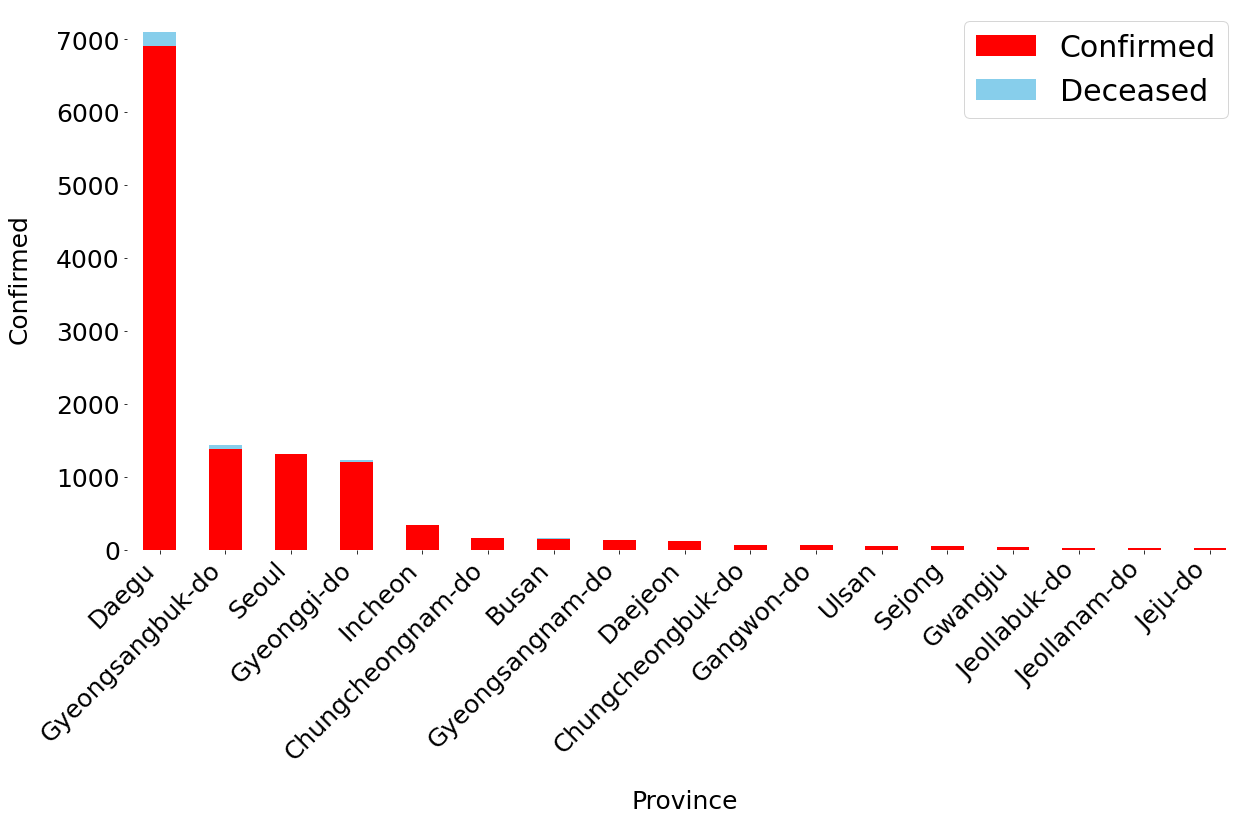

In [109]:
chart = province_all.sort_values('Confirmed', ascending=False).plot(
    kind="bar",
    stacked=True,
    color=["red", "skyblue", "green"],
    figsize=(20, 10),
)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Province", fontsize=25, labelpad=25)
plt.ylabel("Confirmed", fontsize=25, labelpad=25)
plt.legend(loc='upper right', fontsize='30', title_fontsize='30')

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")
sns.despine(left=True, bottom=True);

In [ ]:
Daegu:2,184,528
Busan: 3,468,139
Gyeongsangbuk-do: 2,640,441
Seoul: 9,975,709
Gyeonggi-do: 13,511,676
Incheon: 2,938,457
Chungcheongnam-do:2,176,636
Gyeongsangnam-do: 3,333,056
Daejeon:1,545,717
Chungcheongbuk-do: 1,632,088
Gangwon-do:1,521,763
Ulsan: 1,138,225
Sejong:353,933
Gwangju: 1,526,000
Jeollabuk-do: 1,797,031 
Jeollanum-do: 1,788,807
Jeju-do: 670,858    